# Welcome to our Talk on Machine Learning (ML) using scikit-learn

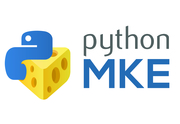

In [1]:
from IPython.display import Image, display
Image('./mke_python.jpeg') 

# Question: why learn ML?

# We will be doing our talk using the Jupyter notebook. Some of the code will vary because of magic functions etc.

In [2]:
'Note: we are using Python version 3.5. If you are 2.7, then the code could be different'
!python -V

Python 3.5.2 :: Anaconda custom (x86_64)


# There is great documentation on the http://scikit-learn.org/ website

http://scikit-learn.org/stable/documentation.html#

# There is a really cool decision tree if you don't know where to start on scikit-learn's website that has links to estimators (models)

http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

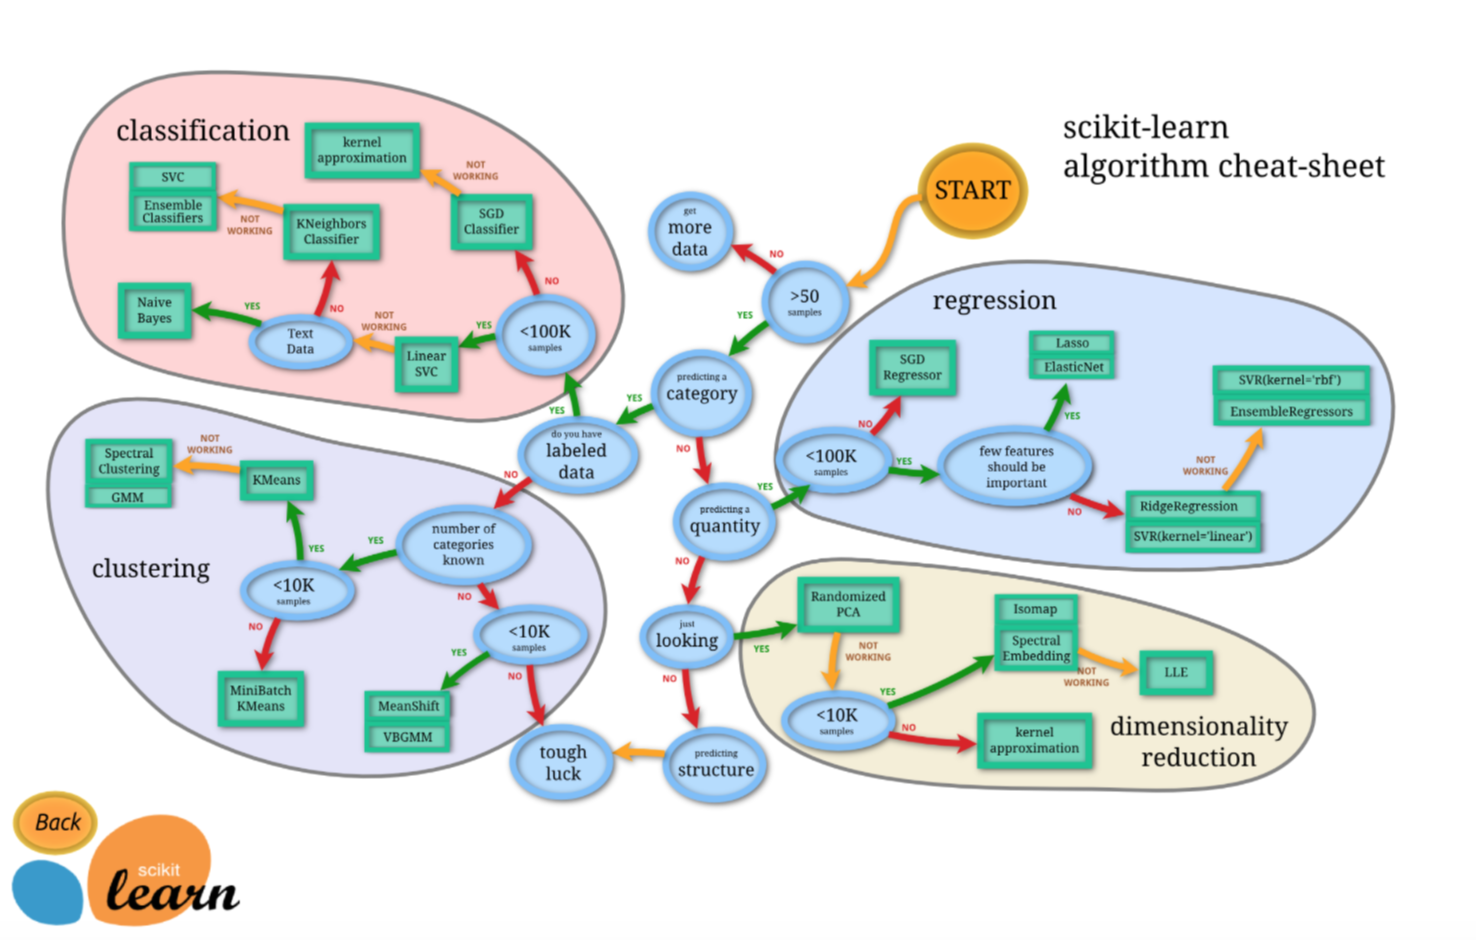

In [3]:
Image('./Scikit-diagram.png') 

# Also, if you are looking for a great place to play with test data, go to Kaggle
https://www.kaggle.com/

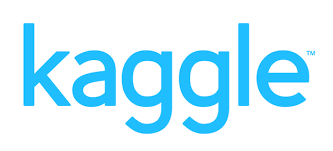

In [4]:
Image('./kaggle_logo.png') 

# Jack Camier Bio:

# - Director of Finance for CarbonLITE, Pastics Recycler

http://www.carbonliterecycling.com/

# - University of San Diego, Bachelors of Accountancy

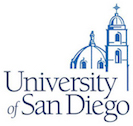

In [6]:
Image('./usd_logo.jpg') 

# - Lean Six Sigma Black Belt certification from Villanova University

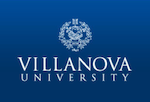

In [7]:
Image('./villanova_logo.png') 

# I program in Python, SQL, Linux, Visual Basic, PHP, JavaScript (jQuery, ReactJS, Node.js, Angular 1) HTML5/CSS, and Qlikview syntax 
# I started programming in Python about two years ago and made it my #1 goto coding language
# I have a startup that predominantly uses Python and we are in the process of implementing scikit-learn as the ML layer on top of the database core

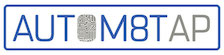

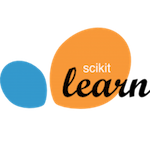

In [8]:
display((Image('./autom8tap_logo.jpg')),(Image('./scikit_learn_logo.png')))

# Special thanks for Jose Portilla, my ML teacher on Udemy and inspiration for this talk that Sachin and I will be doing.
# Also, to ShoreTel for allowing us to use their space

# Now let's do some code with Scikit-learn
# We first want to import our data science tools:

In [9]:
import pandas as pd
import numpy as np

# Please note that Kevin Najimi will be doing a detailed talk on Pandas in March

# And our data visualization libraries

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Let's load our csv file using Pandas

In [11]:
USAhousing = pd.read_csv('zillow_allhomes.csv')

# I will be showing a lot of data analysis features first because the hardest part of ML is having good data

# We can get a sense of our data by using some simple dataframe functions

In [12]:
USAhousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12481 entries, 0 to 12480
Columns: 253 entries, RegionID to 2016-09
dtypes: float64(202), int64(47), object(4)
memory usage: 24.1+ MB


In [13]:
USAhousing.describe()

/Users/jacquescamier/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09
count,12481.000000,12481.000000,12481.00000,9.479000e+03,9.596000e+03,9.618000e+03,9.620000e+03,9.632000e+03,9.632000e+03,9.632000e+03,...,1.248100e+04,1.248100e+04,1.248100e+04,1.248100e+04,1.248100e+04,1.248100e+04,1.248100e+04,1.248100e+04,1.248100e+04,1.248100e+04
mean,80411.474882,46186.903293,6241.00000,1.205052e+05,1.204896e+05,1.204974e+05,1.205789e+05,1.206743e+05,1.207999e+05,1.209790e+05,...,2.536400e+05,2.545099e+05,2.555217e+05,2.566992e+05,2.577561e+05,2.586168e+05,2.594235e+05,2.604256e+05,2.617457e+05,2.629272e+05
std,33188.052384,30425.214388,3603.09869,7.029296e+04,7.003150e+04,7.010103e+04,7.022980e+04,7.029980e+04,7.040037e+04,7.053627e+04,...,2.467275e+05,2.479438e+05,2.493234e+05,2.505403e+05,2.512693e+05,2.516297e+05,2.519178e+05,2.524270e+05,2.529529e+05,2.533642e+05
min,58196.000000,1001.000000,1.00000,2.170000e+04,2.170000e+04,2.200000e+04,2.220000e+04,2.270000e+04,2.320000e+04,2.360000e+04,...,3.060000e+04,3.060000e+04,3.070000e+04,3.050000e+04,3.020000e+04,3.000000e+04,3.030000e+04,3.070000e+04,3.090000e+04,3.130000e+04
25%,65811.000000,19135.000000,3121.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.253000e+05,1.255000e+05,1.257000e+05,1.262000e+05,1.267000e+05,1.271000e+05,1.276000e+05,1.280000e+05,1.289000e+05,1.296000e+05
50%,75862.000000,40223.000000,6241.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.819000e+05,1.826000e+05,1.831000e+05,1.840000e+05,1.848000e+05,1.855000e+05,1.864000e+05,1.872000e+05,1.885000e+05,1.897000e+05
75%,90759.000000,75077.000000,9361.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.927000e+05,2.943000e+05,2.958000e+05,2.972000e+05,2.987000e+05,2.993000e+05,3.003000e+05,3.020000e+05,3.042000e+05,3.061000e+05
max,738092.000000,99901.000000,12481.00000,1.743500e+06,1.745200e+06,1.744300e+06,1.741300e+06,1.739700e+06,1.741300e+06,1.744500e+06,...,6.053400e+06,6.105200e+06,6.154300e+06,6.185800e+06,6.207100e+06,6.220800e+06,6.191400e+06,6.155500e+06,6.126100e+06,6.108000e+06


In [14]:
USAhousing.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09
0,61639,10025,New York,NY,New York,New York,1,NaN,NaN,NaN,...,1072800,1072600,1088500,1103200,1093800,1067400,1046400,1028100,1013900,1004200
1,84654,60657,Chicago,IL,Chicago,Cook,2,146700.0,146500.0,146300.0,...,309400,309200,309100,310000,310600,310700,311100,313100,315800,318300
2,61637,10023,New York,NY,New York,New York,3,NaN,NaN,NaN,...,1118000,1128700,1113100,1084000,1074800,1054400,1026000,1014400,1024200,1032800
3,84616,60614,Chicago,IL,Chicago,Cook,4,198000.0,195500.0,194200.0,...,372800,375100,375300,376000,378500,379900,379500,380100,382400,385200
4,93144,79936,El Paso,TX,El Paso,El Paso,5,70800.0,71000.0,71000.0,...,109800,110000,110200,110500,111100,111200,111600,112600,113300,113600


# We can get column names using pandas columns function

In [15]:
USAhousing.columns

Index(['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank', '1996-04', '1996-05', '1996-06',
       ...
       '2015-12', '2016-01', '2016-02', '2016-03', '2016-04', '2016-05',
       '2016-06', '2016-07', '2016-08', '2016-09'],
      dtype='object', length=253)

## Please note that the type is a dataframe as you will see below

In [16]:
type(USAhousing)

pandas.core.frame.DataFrame

In [17]:
USAhousing.loc[0]

RegionID         61639
RegionName       10025
City          New York
State               NY
Metro         New York
CountyName    New York
SizeRank             1
1996-04            NaN
1996-05            NaN
1996-06            NaN
1996-07            NaN
1996-08            NaN
1996-09            NaN
1996-10            NaN
1996-11            NaN
1996-12            NaN
1997-01            NaN
1997-02            NaN
1997-03            NaN
1997-04            NaN
1997-05            NaN
1997-06            NaN
1997-07            NaN
1997-08            NaN
1997-09            NaN
1997-10            NaN
1997-11            NaN
1997-12            NaN
1998-01            NaN
1998-02            NaN
                ...   
2014-04         901900
2014-05         909200
2014-06         913700
2014-07         912300
2014-08         909600
2014-09         907600
2014-10         910200
2014-11         920900
2014-12         931500
2015-01         938800
2015-02         939700
2015-03         948900
2015-04    

# Let's get the mean (average) for Zipcode 10025, New York

In [18]:
USAhousing[USAhousing['RegionName']==10025]

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09
0,61639,10025,New York,NY,New York,New York,1,NaN,NaN,NaN,...,1072800,1072600,1088500,1103200,1093800,1067400,1046400,1028100,1013900,1004200


In [19]:
USAhousing_mean_ny = (USAhousing.loc[0][7:].mean())
'The average home price is ${:,.2f}'.format(USAhousing_mean_ny)+' for zipcode 10025'

'The average home price is $804,557.14 for zipcode 10025'

# How about a zipcode in Milwaukee, 53209

In [20]:
USAhousing[USAhousing['RegionName']==53209]

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09
572,81289,53209,Milwaukee,WI,Milwaukee,Milwaukee,573,41400.0,41500.0,41400.0,...,56400,56500,56700,57100,57100,56400,55800,55600,55800,56100


## Note that pandas gives us the row# of 572

In [21]:
USAhousing_mean_mk = (USAhousing.loc[572][7:].mean())
USAhousing_mk_zip = str(USAhousing.loc[572][1]) # Note that 1 is the column for zipcodes
'The average home price is ${:,.2f}'.format(USAhousing_mean_mk)+' for zipcode '+USAhousing_mk_zip

'The average home price is $65,644.31 for zipcode 53209'

# Let's look at a distribution plot of all zip codes for September 2016

/Users/jacquescamier/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


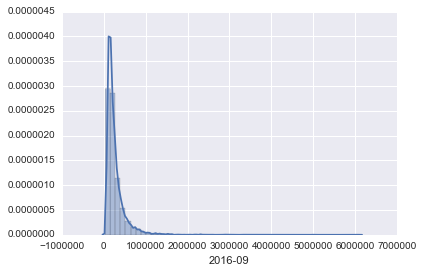

In [22]:
sns.distplot(USAhousing['2016-09']) 

# Let's create a new dataframe with just the data we need to do our ML analysis for zipcode 53209

In [23]:
mke_reg = USAhousing[USAhousing['RegionName']==53209] #Change the zipcode to see different graph trends

# As well as the data points about this zipcode

In [24]:
mke_reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 572 to 572
Columns: 253 entries, RegionID to 2016-09
dtypes: float64(202), int64(47), object(4)
memory usage: 2.0+ KB


In [25]:
mke_housing_prices = mke_reg.iloc[0][7:]

In [26]:
type(mke_housing_prices)

pandas.core.series.Series

# Let's parse the data so we can have our x axis as a valid date for charting

In [28]:
import datetime as dt
from matplotlib.finance import date2num
from dateutil.parser import parse
periods = []
for i in mke_housing_prices.index:
    temp = parse(i).strftime('%m-%d-%Y')
    temp = dt.datetime.strptime(temp, "%m-%d-%Y")
    periods.append(temp)
x_list = periods
print(periods) 

[datetime.datetime(1996, 4, 26, 0, 0), datetime.datetime(1996, 5, 26, 0, 0), datetime.datetime(1996, 6, 26, 0, 0), datetime.datetime(1996, 7, 26, 0, 0), datetime.datetime(1996, 8, 26, 0, 0), datetime.datetime(1996, 9, 26, 0, 0), datetime.datetime(1996, 10, 26, 0, 0), datetime.datetime(1996, 11, 26, 0, 0), datetime.datetime(1996, 12, 26, 0, 0), datetime.datetime(1997, 1, 26, 0, 0), datetime.datetime(1997, 2, 26, 0, 0), datetime.datetime(1997, 3, 26, 0, 0), datetime.datetime(1997, 4, 26, 0, 0), datetime.datetime(1997, 5, 26, 0, 0), datetime.datetime(1997, 6, 26, 0, 0), datetime.datetime(1997, 7, 26, 0, 0), datetime.datetime(1997, 8, 26, 0, 0), datetime.datetime(1997, 9, 26, 0, 0), datetime.datetime(1997, 10, 26, 0, 0), datetime.datetime(1997, 11, 26, 0, 0), datetime.datetime(1997, 12, 26, 0, 0), datetime.datetime(1998, 1, 26, 0, 0), datetime.datetime(1998, 2, 26, 0, 0), datetime.datetime(1998, 3, 26, 0, 0), datetime.datetime(1998, 4, 26, 0, 0), datetime.datetime(1998, 5, 26, 0, 0), datet

In [29]:
type(x_list)

list

# Right now it is a list but matplotlib likes arrays
## We can use numpy to do this

In [30]:
X = np.asarray(x_list)
#x.size # 246
type(X)

numpy.ndarray

In [31]:
y = mke_housing_prices.values
#y.size # 246
type(y) 

numpy.ndarray

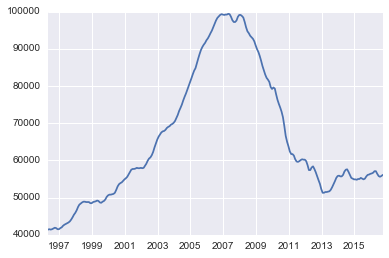

In [32]:
plt.plot(X, y) # chart using Matplotlib

# Looks like the great recession really impacted home prices in this area

# Now to do some ML regression analysis
## First set your X and y arrays

In [33]:
print(X)

[datetime.datetime(1996, 4, 26, 0, 0) datetime.datetime(1996, 5, 26, 0, 0)
 datetime.datetime(1996, 6, 26, 0, 0) datetime.datetime(1996, 7, 26, 0, 0)
 datetime.datetime(1996, 8, 26, 0, 0) datetime.datetime(1996, 9, 26, 0, 0)
 datetime.datetime(1996, 10, 26, 0, 0)
 datetime.datetime(1996, 11, 26, 0, 0)
 datetime.datetime(1996, 12, 26, 0, 0) datetime.datetime(1997, 1, 26, 0, 0)
 datetime.datetime(1997, 2, 26, 0, 0) datetime.datetime(1997, 3, 26, 0, 0)
 datetime.datetime(1997, 4, 26, 0, 0) datetime.datetime(1997, 5, 26, 0, 0)
 datetime.datetime(1997, 6, 26, 0, 0) datetime.datetime(1997, 7, 26, 0, 0)
 datetime.datetime(1997, 8, 26, 0, 0) datetime.datetime(1997, 9, 26, 0, 0)
 datetime.datetime(1997, 10, 26, 0, 0)
 datetime.datetime(1997, 11, 26, 0, 0)
 datetime.datetime(1997, 12, 26, 0, 0) datetime.datetime(1998, 1, 26, 0, 0)
 datetime.datetime(1998, 2, 26, 0, 0) datetime.datetime(1998, 3, 26, 0, 0)
 datetime.datetime(1998, 4, 26, 0, 0) datetime.datetime(1998, 5, 26, 0, 0)
 datetime.datetim

In [34]:
y = mke_housing_prices.values
print(y)

[41400.0 41500.0 41400.0 41500.0 41700.0 41900.0 41800.0 41500.0 41500.0
 41800.0 42000.0 42400.0 42700.0 42900.0 43100.0 43300.0 43600.0 44100.0
 44700.0 45400.0 45900.0 46600.0 47500.0 48100.0 48400.0 48700.0 48900.0
 48900.0 48800.0 48800.0 48800.0 48500.0 48500.0 48800.0 48900.0 49000.0
 49200.0 49100.0 48700.0 48600.0 48900.0 49100.0 49500.0 50200.0 50600.0
 50800.0 50800.0 50900.0 51000.0 51300.0 52100.0 53000.0 53600.0 53900.0
 54100.0 54500.0 54900.0 55200.0 55600.0 56200.0 56900.0 57500.0 57700.0
 57700.0 57800.0 58000.0 57900.0 57900.0 58000.0 57900.0 58000.0 58500.0
 59100.0 59900.0 60500.0 60800.0 61400.0 62300.0 63500.0 64600.0 65600.0
 66400.0 67000.0 67500.0 67800.0 67900.0 68200.0 68700.0 69000.0 69200.0
 69600.0 69800.0 70100.0 70600.0 71400.0 72200.0 73300.0 74100.0 75000.0
 76100.0 77100.0 78000.0 79000.0 80100.0 81000.0 82100.0 83200.0 84100.0
 84800.0 86100.0 87400.0 88600.0 89700.0 90500.0 91100.0 91600.0 92300.0
 92800.0 93500.0 94200.0 94900.0 95800.0 96800.0 97

# Now, import Scikit-learn library

In [36]:
from sklearn.cross_validation import train_test_split

# Train Test Split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

# Creating and Training the Model for Regression Analysis

In [38]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

# And then fit the model

In [39]:
lm.fit(X_train,y_train)

TypeError: float() argument must be a string or a number, not 'datetime.datetime'

# What the foo is that...!
## No problem, let's create the dates to be a float that Scikit can understand

In [40]:
len(y)

246

In [41]:
X = []
for i in range(len(y)):
    X.append(i)
print(X)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

# Right now X is a list

In [42]:
type(X)

list

## Now we need to convert this list into an array for scikit learn

In [43]:
X = np.array(X)
type(X)

numpy.ndarray

# Let's run our ML model estimator again

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)
lm = LinearRegression()
lm.fit(X_train,y_train)

/Users/jacquescamier/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: Found arrays with inconsistent numbers of samples: [  1 147]

## Another error, no worries. We will use Python to manipulate the data
## Let's see what X looks like

In [45]:
X

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

## We can reconfigure the array to be a format that scikit can use

In [46]:
X = X.reshape(-1,1) 
X

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

## Let's see if this fixed our Scikit Regression Model

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Wahoo!

## Model Evaluation

## Let's evaluate the model by checking out it's coefficients and how we can interpret them.

## The next section gets into some ML topics that are outside the scope of this talk but I have included it for those who are interested

In [48]:
# print the intercept
print(lm.intercept_)

59242.155473


In [49]:
lm.coef_

array([ 58.23035271])

## Predictions from our Model

## Let's look at our predictions off our test set and see how well it did!

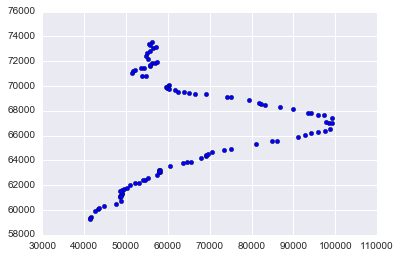

In [50]:
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)

/Users/jacquescamier/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


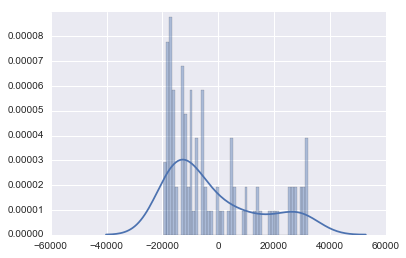

In [51]:
sns.distplot((y_test-predictions),bins=50);

# This model didn't do to well for predictions. At this time, you would continue to manipulate the data and tweak the model until it started predicting better

# It should look something like this:

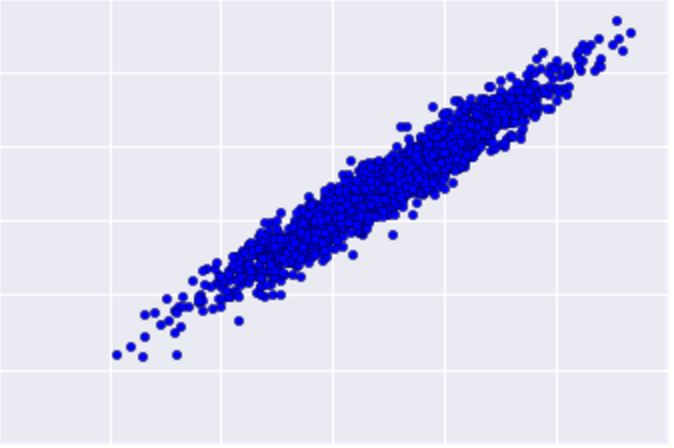

In [52]:
Image('./good_regression_img.png') 

# Break - Sachin's presentation



# --------------------------------------------------

# Philosopy of AI (Artificial Intelligence)

# There are a lot of benefits to AI but there could be negative consequeces

# In May 2013, according to Microsoft Academic Search, 100 most cited authors believe with 90% confidence by Year 2070 that computers will rival our intelligence

# Applying Moore's law of computer power doubling every 18 months, shortly after computers could become superintelligent, sentient beings i.e. smarter than us

# What then? What will happen to humanity?

# We are transitioning out of the Industrial Revolution to the Informational Revolution

In [ ]:
Image('./informational_age.jpg') 

# That is very exciting for us in IT, but it will cause many who don't have expertise in this field, to lose their jobs

# What will be the landscape then?

<font size='5'color='red'face="verdana">Computers are focused on efficiently doing things and human beings are not efficient nor beneficial in general to the earth</font>

# “If all the insects were to disappear from the earth, within 50 years all life on earth would end. If all human beings disappeared from the earth, within 50 years all forms of life would flourish.”
# - Jonas Salk

# We human beings don't have a great track record!

# Computers would veiw us poorly

# Think about these superintelligent sentient beings:

In [ ]:
Image('./ultron.jpg') 

In [ ]:
Image('./samaritan.png') 

In [ ]:
Image('./terminator.jpg') 

# Not necessarily the sentient beings you want to have a beer with!

<font size='6'color='red'face="verdana">Anyone who opposes them, would be seen as bad viruses to eliminate!</font>
<br><br>
<font size='5'color='#F88017'face="verdana">Not the future I want to be part of!</font>

# There is currently a debate on how to proceed with AI:

# A laissez-faire approach as to "just let it ride" without any constraints

# Or we need to get ahead of this and really make sure we build smart

# I am in the camp that morality should be programmed into AI. Maybe we start with the ten commandments or something close to it?

# How about I am a sentient being and I am here to work alongside humanity and not kill them?

# How about?

In [1]:
from ai import ToBe
sentient_being = ToBe()

In [2]:
sentient_being.ai_exist()

I am alive!


In [3]:
sentient_being.cause()

I can cause something
cause is set to 1


In [4]:
sentient_being.love_human()

I will not kill humans
I will work with humans


# Let's take time in the present to flesh out this AI future with thought and get ahead of the AI revolution!

# Thank you

In [5]:
sentient_being.thank_you()

Thank you humans. I am here to serve you
